# Sentiment Analysis

- The process of analyzing text to determine if the emotional tone of the message is positive, negative, or neutral.
- **For Example:** A business could use sentiment analysis to determine what is right or wrong about their product and understand more about their customers

# Neural Network

- A machine learning model that teaches computers to process data in a way that is inspired by the human brain. It uses interconnected nodes or neurons in a layered structure that resembles the human brain.
- Creates an adaptive system that computers use to learn from their mistakes and improve continuously
- **For Example:** Identifying an animal

<img src="NeuralNetwork.png" width="500"/>

- **Input Layer:** Information from the outside world enters the neural network. The input nodes then process the data, analyze or categorize it, and then passes it on the the next layer
- **Hidden Layers:** Takes the input from the input layer or other hidden layers. Neural Networks can have a large number of hidden layers where each layer analyzes the output from the previous layer, processes it further, and passes it on to the next layer
- **Weights:** A node in the layers will assign a number. When the layer/network is active, the node receives a number representing the data and multiplies it by the associated weight.
    - These are parameters that are adjusted during the training process to minimize the difference between the actual output and the target output
    - The adjustment of weights and biases are done in the hidden layers, constantly changing to improve the outputs
- **Output Layer:** Gives the final result of all the data processing by the artificial neural network. In our analysis, we have a binary result (0 or 1), so there will be 2 nodes resulting in either 0 or 1. Other neural networks can have mutliple output nodes where there are more than 2 classifications (angry, sad, happy, etc...)
    - The output of a neuron is expressed by: output = inputs * weights + bias
    - Based on the threshold, the output is classified into the possible results
- **Activation Functions:** Math functions applied to the output of a neuron or a layer. They introduce non-linearity into the network, allowing the model to learn complex relationships

### Research Question:
Is it possible to use a neural network and sentiment analysis to predict positive or negative connatation from text reviews about how customers feel about a product or service, without human interpretation.
- This analysis will enable the business to quickly synthesize large amounts of sentiment and quickly aggregate responses to the overall reception of products and services over time.

## Data
- 3 text files, negative or positive indicator is separated by a tab:
   - Amazon: Reviews about a product
   - IMDB: Reviews about a movie
   - Yelp: Reviews about a restuarant

In [35]:
import pandas as pd

- In the text files, there are no headers
- Import the data with a tab separator
- The tab indicator requires a python engine
- Add a column to each import to record the source
- **Supervised vs Unsupervised Learning:** Supervised learning uses labeled training data, while unsupervised does not
     - Clustering algorithms/models are a a form of unsupervised learning

In [104]:
#import amazon file
df_part1 = pd.read_csv('Datasets/amazon_cells_labelled.txt', sep='\t+', engine='python', header=None)
df_part1['source'] = 'Amazon'
df_part1.head()

,0,1,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon


In [105]:
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   source  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [106]:
#import imdb file
df_part2 = pd.read_csv('Datasets/imdb_labelled.txt', sep='\t+', engine='python', header=None)
df_part2['source'] = 'IMDB'
df_part2.head()

,0,1,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDB
1,Not sure who was more lost - the flat characte...,0,IMDB
2,Attempting artiness with black & white and cle...,0,IMDB
3,Very little music or anything to speak of.,0,IMDB
4,The best scene in the movie was when Gerardo i...,1,IMDB


In [107]:
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   source  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [108]:
#import yelp file
df_part3 = pd.read_csv('Datasets/yelp_labelled.txt', sep='\t', header=None)
df_part3['source'] = 'Yelp'
df_part3.head()

,0,1,source
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp


In [109]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   source  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


##### Combine the data together and specify header names

In [330]:
df = pd.concat([df_part1,df_part2,df_part3], ignore_index=True)
df

,0,1,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp
2996,Appetite instantly gone.,0,Yelp
2997,Overall I was not impressed and would not go b...,0,Yelp
2998,"The whole experience was underwhelming, and I ...",0,Yelp


In [332]:
df.columns=['text','label','source']
df

,text,label,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp
2996,Appetite instantly gone.,0,Yelp
2997,Overall I was not impressed and would not go b...,0,Yelp
2998,"The whole experience was underwhelming, and I ...",0,Yelp


##### Convert the label column to int

In [299]:
df.label = df.label.astype(int)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   label   3000 non-null   int32 
 2   source  3000 non-null   object
dtypes: int32(1), object(2)
memory usage: 58.7+ KB


In [302]:
# natural language toolkit
import nltk
## nltk.download('stopwords')

### Data Preperation
- Remove stopwords
     - Words that have high frequency but carry little meaning (the, a, and, or, etc...)
- Remove special characters
- Transform reviews to be all lowercase characters

In [336]:
from nltk.corpus import stopwords #standard english stopwords

stopWords = set(stopwords.words('english'))

- Apply: Applies the lambda function to each element of the text column
- Lambda function: Takes each element in the text column, and splits it into individual words
    - Loops through each word in the text and removes it if it is in the stopwords set.
    - The lambda function then joins back together all the words after the stopwords have been removed (using the join function)

In [337]:
df.text = df.text.apply(lambda x: ' '.join([word for word in x.split() 
                                        if word.lower() not in stopWords]))

##### Remove Special Characeters
- Removes punctuation, emojis, etc...
- Loops through each text record in the dataframe, then loops through each character in the text and adds the character if it does not already exist in the list
- Essentially, the code below is creating a distinct list of all the characters that are used in the reviews we imported

In [338]:
#list all characters
characters =[]
for comment in df.text:
    for character in comment:
        if character not in characters:
            characters.append(character)
print(characters)

['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'U', 'S', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', '.', 'G', 'd', ',', 'E', 'x', 'j', 'b', 'T', 'i', 'h', '4', '5', 'm', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'f', 'N', 'q', '+', '"', 'H', 'V', 'Y', 'F', 'D', 'W', 'k', "'", 'K', 'C', '/', 'I', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']', '\x96', 'é', 'å', '\x97', 'ê']


##### Convert text to unicode

In [339]:
from unidecode import unidecode

df.text = df.text.apply(unidecode)

In [340]:
characters =[]
for comment in df.text:
    for character in comment:
        if character not in characters:
            characters.append(character)
print(characters)

['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'U', 'S', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', '.', 'G', 'd', ',', 'E', 'x', 'j', 'b', 'T', 'i', 'h', '4', '5', 'm', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'f', 'N', 'q', '+', '"', 'H', 'V', 'Y', 'F', 'D', 'W', 'k', "'", 'K', 'C', '/', 'I', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']']


##### Replace special characters with a space
- regex=True: Treats the expression as a regular expression
- [^0-9a-zA-Z ] is an expression that matches any character that is not a digit (0-9), a lowercase letter (a-z) or an uppercase letter (A-Z), or a space.

In [341]:
df.text = df.text.replace(r'[^0-9a-zA-Z ]', ' ', regex=True)

##### Transform text to all lowercase
- Typically, with sentiment analysis, it might be best to leave the case as it is, however, since we don't have a lot data, it's best to convert it all to lowercase to align cardinality
- This allows us to minimize unique words to find patterns

In [342]:
df.text = df.text.str.lower()
df.text

0                        way plug us unless go converter 
1                             good case  excellent value 
2                                          great jawbone 
3       tied charger conversations lasting 45 minutes ...
4                                              mic great 
                              ...                        
2995                   think food flavor texture lacking 
2996                             appetite instantly gone 
2997                     overall impressed would go back 
2998    whole experience underwhelming  think we ll go...
2999    then  wasted enough life there  poured salt wo...
Name: text, Length: 3000, dtype: object

##### WordNetLemmatizer is used to lemmatize words, which is the process of reducing words to their base or dictionary form, known as the lemma
- For Example: "Cats" can be reduced to the base form "Cat"

In [343]:
from nltk.stem import WordNetLemmatizer #word grouping
### tokenize / lamatize
wnl = WordNetLemmatizer()

##### word_tokenize() is used to split a text string into individual words based on whitespace and punctuation

In [344]:
#custom function to lammatize each tokenized word
from nltk.tokenize import word_tokenize

def lemmatize_text(text):
    return [wnl.lemmatize(w) for w in word_tokenize(text)]

In [345]:
# One time download
# nltk.download('punkt')
# nltk.download('wordnet')

- Call the custom function that was created above and apply it to each review in the dataframe
- The function will return a list of the simplified/lemmatized words

In [346]:
#apply function to each row in text column
df.text = df.text.apply(lemmatize_text) 

In [347]:
df.text

0                   [way, plug, u, unless, go, converter]
1                          [good, case, excellent, value]
2                                        [great, jawbone]
3       [tied, charger, conversation, lasting, 45, min...
4                                            [mic, great]
                              ...                        
2995              [think, food, flavor, texture, lacking]
2996                          [appetite, instantly, gone]
2997                [overall, impressed, would, go, back]
2998    [whole, experience, underwhelming, think, we, ...
2999    [then, wasted, enough, life, there, poured, sa...
Name: text, Length: 3000, dtype: object

##### Recreate the sentence

In [348]:
#recreates sentence
df.text = df.text.str.join(' ')
df.text

0                          way plug u unless go converter
1                               good case excellent value
2                                           great jawbone
3       tied charger conversation lasting 45 minute ma...
4                                               mic great
                              ...                        
2995                    think food flavor texture lacking
2996                              appetite instantly gone
2997                      overall impressed would go back
2998    whole experience underwhelming think we ll go ...
2999    then wasted enough life there poured salt woun...
Name: text, Length: 3000, dtype: object

fit_on_text: Takes df.text creates a vocab index based on word frequency
- The higher the index, the less often the word is used
- Removing the stopwords helps with this process so that we don't get meaningless words as a low index

In [351]:
from tensorflow.keras.preprocessing.text import Tokenizer
###retokenize with keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
# print(tokenizer.word_index)

In [350]:
###Get vocabulary size
vocab_size = len(tokenizer.word_index)+1 
vocab_size

4742

- Calculates the number of words in each review (row in dataframe)
- Found the max, min, and median

In [318]:
import numpy as np
#get max word length
comment_lengths = []
for words in df.text:
        comment_lengths.append(len(words.split(' ')))
        
maxlen = np.max(comment_lengths)
min = np.min(comment_lengths)
med = np.median(comment_lengths)
print ("Maximum: " + str(maxlen))
print ("Minimum: " + str(min))
print ("Median: " + str(med))

Maximum: 46
Minimum: 1
Median: 5.0


array([[<Axes: title={'center': '0'}>]], dtype=object)

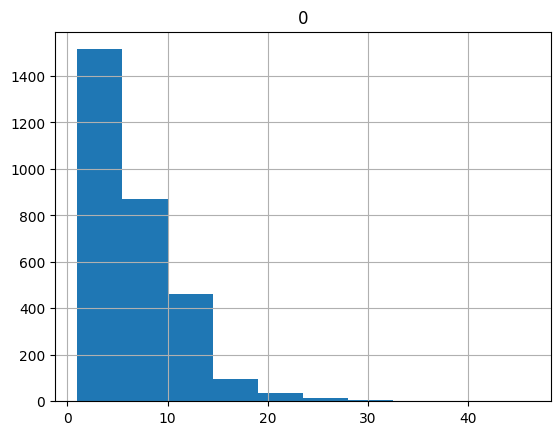

In [319]:
df2 = pd.DataFrame(comment_lengths)
df2.hist()

##### Calculate the sequence length for padding by taking the 4th root of the vocabulary length

In [321]:
fourthroot = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
fourthroot

8

### Padding Process
- Purpose is to build a data set where all rows have the same shape and structure
- Adds spaces for text that does not have a length of 8 words/spaces and truncates extra words/spaces for reviews that have a length greater than 8 words
- Ideal sequence length is 8
- text_to_sequences: Converts a list of text into a sequence of integers
- pad_sequences: Performs padding and truncating of sequences

In [322]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#pad text
sequences = tokenizer.texts_to_sequences(df.text) #embed as dense vectors
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=fourthroot) 
df['padded'] = pd.Series(list(padded))

In [323]:
df.padded

0              [46, 270, 110, 504, 25, 2109, 0, 0]
1                     [1, 62, 36, 334, 0, 0, 0, 0]
2                      [3, 1013, 0, 0, 0, 0, 0, 0]
3       [2110, 136, 672, 1014, 1383, 63, 1384, 84]
4                       [803, 3, 0, 0, 0, 0, 0, 0]
                           ...                    
2995             [48, 12, 269, 1331, 613, 0, 0, 0]
2996              [4737, 4738, 937, 0, 0, 0, 0, 0]
2997               [192, 169, 19, 25, 24, 0, 0, 0]
2998       [282, 88, 1998, 48, 397, 176, 25, 4739]
2999    [1322, 360, 67, 93, 126, 4740, 1343, 4741]
Name: padded, Length: 3000, dtype: object

##### Since the label only includes 0 (negative) or 1 (positive), the final layer of neural network will be dense with 2 nodes

<Axes: xlabel='label', ylabel='count'>

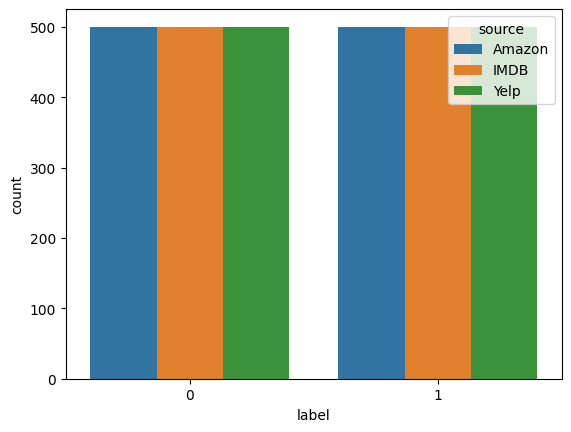

In [324]:
import seaborn as sns

#confirm sentiment distribution
sns.countplot(data=df, x='label',hue=df.source)

##### Set the X and y variables

In [328]:
from tensorflow.keras.utils import to_categorical # target encoding

#set x and y
X = padded
y = to_categorical(df.label)

##### Split dataset into train and test
- 80/20 split
- Stratify sampling: Ensures that the categories in a dataset is preserved in the training and testing set

In [84]:
from sklearn.model_selection import train_test_split #for data split

#perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1, stratify = y)

In [326]:
print(X_train.shape)
print(X_test.shape) 

(2400, 8)
(600, 8)


## Part 2

In [ ]:
##propose embedding length
embedlen = 50

In [87]:
from tensorflow.keras.callbacks import EarlyStopping #to optimize efficently
### initial model architecture
#set patience for early stopping
early_stopping_monitor = EarlyStopping(patience=2)

In [90]:
from tensorflow.keras.models import Sequential, load_model #for sequential model / saving results
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, SpatialDropout1D, Dropout, Convolution1D, Flatten #NLP layers

### model 1
model = Sequential() #simplest layers
model.add(Embedding(vocab_size, embedlen, input_length=fourthroot)) #input layer
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='sigmoid')) #output layer 2 nodes: positive or negative sigmoid over softmax because prediction is binary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #compile with adam to automatically adjust learning rate #compile with binary crossentropy loss function for binary categorical prediction #show accuracy of weights during each epoch
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, callbacks=[early_stopping_monitor])
model.summary() #show layers

scores = model.evaluate(X_test, y_test)

Epoch 1/20


C:\Users\EHIDRPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4935 - loss: 0.6936 - val_accuracy: 0.5583 - val_loss: 0.6899
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.6823 - val_accuracy: 0.6383 - val_loss: 0.6674
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7171 - loss: 0.6169 - val_accuracy: 0.7367 - val_loss: 0.5396
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.4190 - val_accuracy: 0.7567 - val_loss: 0.4838
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9022 - loss: 0.2791 - val_accuracy: 0.7650 - val_loss: 0.4800
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.1972 - val_accuracy: 0.7633 - val_loss: 0.4891
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1524 - val_accuracy: 0.7700 - val_loss: 0.5174


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 8, 50)                 │         239,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 8, 50)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 400)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 400)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 50)                    │          20,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 50)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 777,608 (2.97 MB)

 Trainable params: 259,202 (1012.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 518,406 (1.98 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7612 - loss: 0.5152


In [91]:
#75% accurate, .52 loss
#w/ dropouts 75% accurate .49 loss
#w/ 50-> 180 nodes. no improvement
#with 2x dense layers and all dropouts no improvement
# lstm model instead -> no improvement
#batch size no change
#LSTM no change. bidirectional no change
#data looks as clean as possible

#no matter the hyper parameter tuningmodel is hoving at 50% loss for test, and 99% accuracy for train.  so the model is overfit and the prediction is no better than a coin flip.


In [92]:
############ training alternate model architecture

### test
model = Sequential() #simplest layers
model.add(Embedding(vocab_size, embedlen, input_length=fourthroot)) #input layer
model.add(Bidirectional(LSTM(units=64, dropout=0.1,  recurrent_dropout=0.1)))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='sigmoid')) #output layer 2 nodes: positive or negative sigmoid over softmax because prediction is binary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #compile with adam to automatically adjust learning rate #compile with binary crossentropy loss function for binary categorical prediction #show accuracy of weights during each epoch
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, callbacks=[early_stopping_monitor])
model.summary() #show layers

scores = model.evaluate(X_test, y_test)     

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5300 - loss: 0.6887 - val_accuracy: 0.7517 - val_loss: 0.5228
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.4231 - val_accuracy: 0.7500 - val_loss: 0.4956


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (32, 8, 50)                 │         239,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (32, 128)                   │          58,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 50)                    │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (32, 50)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 2)                     │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 913,448 (3.48 MB)

 Trainable params: 304,482 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 608,966 (2.32 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.4876 


In [93]:
#plot - setup variables
epochs = range(1, len(history.history['accuracy']) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

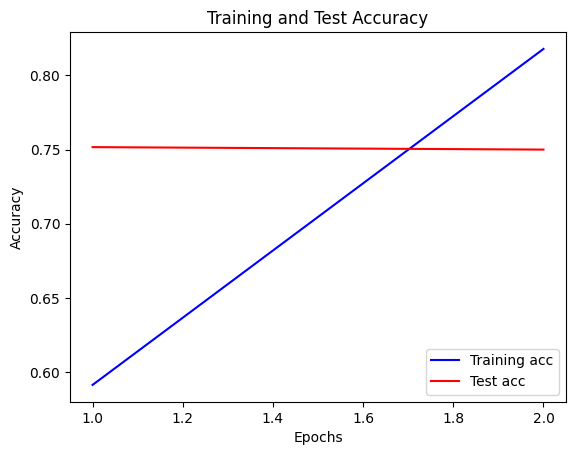

In [95]:
import matplotlib.pyplot as plt
#plot accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

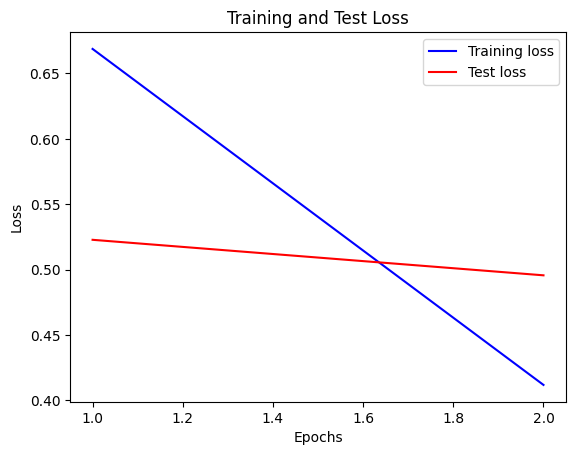

In [96]:
#plot loss
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
#predict with test set
#predictions = model.predict(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")

positive_predictions = predictions[:,1] 
positive_labels = y_test[:,1] 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [99]:
from sklearn.metrics import classification_report #other performance metrics
print(classification_report(positive_labels, positive_predictions))


              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       300
         1.0       0.85      0.61      0.71       300

    accuracy                           0.75       600
   macro avg       0.77      0.75      0.74       600
weighted avg       0.77      0.75      0.74       600



In [101]:
from sklearn.metrics import confusion_matrix #prediction comparison
print(confusion_matrix(positive_labels, positive_predictions))


[[268  32]
 [118 182]]
